In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
df = pd.read_csv("/Users/sa21/Desktop/nba-stats-api/data/player_stats/merge2000-2024.csv")
df['Year'] = pd.to_datetime(df['Year'].str.split('-').str[0], format='%Y')
# Sort the DataFrame
df = df.sort_values(by='Year')
df.drop_duplicates()

,Year,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Awards,Player-additional
24631,2000-01-01,Luc Longley,32.0,NYK,C,25.0,2.0,301.0,18.0,54.0,...,66.0,7.0,3.0,9.0,22.0,51.0,49.0,0.0,NaN,longllu01
13948,2000-01-01,Tracy McGrady,21.0,ORL,SG,77.0,77.0,3087.0,788.0,1724.0,...,580.0,352.0,116.0,118.0,198.0,160.0,2065.0,0.0,MVP-6MIP-1ASNBA2,mcgratr01
13947,2000-01-01,Vince Carter,24.0,TOR,SF,75.0,75.0,2979.0,762.0,1656.0,...,416.0,291.0,114.0,82.0,167.0,205.0,2070.0,0.0,MVP-11ASNBA2,cartevi01
13946,2000-01-01,Paul Pierce,23.0,BOS,SF,82.0,82.0,3120.0,687.0,1513.0,...,522.0,253.0,138.0,69.0,262.0,251.0,2071.0,0.0,-MVP 13.00,piercpa01
13945,2000-01-01,Shaquille O'Neal,28.0,LAL,C,74.0,74.0,2924.0,813.0,1422.0,...,940.0,277.0,47.0,204.0,218.0,256.0,2125.0,0.0,MVP-3DPOY-8ASNBA1,onealsh01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28741,2023-01-01,Killian Hayes,22.0,DET,PG,42.0,31.0,1008.0,117.0,283.0,...,119.0,205.0,36.0,20.0,51.0,75.0,289.0,0.0,NaN,hayeski01
28742,2023-01-01,Marcus Smart,29.0,MEM,PG,20.0,20.0,605.0,102.0,237.0,...,53.0,86.0,41.0,5.0,62.0,53.0,289.0,0.0,NaN,smartma01
28743,2023-01-01,Craig Porter Jr.,23.0,CLE,PG,51.0,6.0,649.0,116.0,228.0,...,109.0,118.0,21.0,15.0,45.0,40.0,285.0,0.0,NaN,portecr01
28744,2023-01-01,Max Christie,20.0,LAL,SG,67.0,7.0,944.0,103.0,241.0,...,142.0,60.0,20.0,17.0,35.0,57.0,284.0,0.0,NaN,chrisma02


In [209]:
df = df[['Year', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Trp-Dbl', 'Awards']] 
df = df.rename(columns={'Pos': 'Position',
    'G': 'Games_Played',
    'GS': 'Games_Started',
    'MP': 'Minutes_Played',
    'FG': 'Field_Goals_Made',
    'FG%': 'Field_Goal_Percentage',
    '3P': 'Three_Pointers_Made',
    '3PA': 'Three_Pointers_Attempted',
    '3P%': 'Three_Point_Percentage',
    '2P': 'Two_Pointers_Made',
    '2PA': 'Two_Pointers_Attempted',
    '2P%': 'Two_Point_Percentage',
    'eFG%': 'Effective_Field_Goal_Percentage',
    'FT': 'Free_Throws_Made',
    'FTA': 'Free_Throws_Attempted',
    'FT%': 'Free_Throw_Percentage',
    'TRB': 'Total_Rebounds',
    'AST': 'Assists',
    'STL': 'Steals',
    'BLK': 'Blocks',
    'TOV': 'Turnovers',
    'PF': 'Personal_Fouls',
    'PTS': 'Points',
    'Trp-Dbl': 'Triple_Doubles',})

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44058 entries, 24631 to 39341
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Year                             44058 non-null  datetime64[ns]
 1   Player                           44058 non-null  object        
 2   Age                              43986 non-null  float64       
 3   Team                             43986 non-null  object        
 4   Position                         43986 non-null  object        
 5   Games_Played                     43986 non-null  float64       
 6   Games_Started                    43986 non-null  float64       
 7   Minutes_Played                   43986 non-null  float64       
 8   Field_Goals_Made                 43986 non-null  float64       
 9   Field_Goal_Percentage            43785 non-null  float64       
 10  Three_Pointers_Made              43986 non-null  float64   

In [211]:
df.describe()

,Year,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals_Made,Field_Goal_Percentage,Three_Pointers_Made,Three_Pointers_Attempted,Three_Point_Percentage,...,Free_Throws_Attempted,Free_Throw_Percentage,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Points,Triple_Doubles
count,44058,43986.000000,43986.000000,43986.000000,43986.000000,43986.000000,43785.000000,43986.000000,43986.000000,38130.000000,...,43986.000000,41733.000000,43986.000000,43986.000000,43986.000000,43986.000000,43986.000000,43986.000000,43986.000000,43983.000000
mean,2012-03-25 04:01:30.208361728,26.568340,45.369186,21.325945,1046.677602,163.861001,0.435469,35.401173,99.174396,0.291594,...,101.615332,0.730097,184.154208,97.521211,32.793139,20.908539,59.367958,90.013709,440.439231,0.115135
min,2000-01-01 00:00:00,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006-01-01 00:00:00,23.000000,22.000000,0.000000,262.000000,30.000000,0.395000,0.000000,3.000000,0.238000,...,16.000000,0.667000,41.000000,14.000000,7.000000,3.000000,13.000000,27.000000,80.000000,0.000000
50%,2013-01-01 00:00:00,26.000000,48.000000,7.000000,858.000000,110.000000,0.437000,12.000000,39.000000,0.333000,...,57.000000,0.755000,130.000000,53.000000,24.000000,10.000000,42.000000,79.000000,292.000000,0.000000
75%,2018-01-01 00:00:00,29.000000,69.000000,38.000000,1715.000000,251.000000,0.483000,55.000000,157.000000,0.376000,...,141.000000,0.826000,267.000000,130.000000,49.000000,26.000000,88.000000,142.000000,670.000000,0.000000
max,2023-01-01 00:00:00,44.000000,85.000000,83.000000,3485.000000,978.000000,1.000000,402.000000,1028.000000,1.000000,...,972.000000,1.000000,1247.000000,925.000000,225.000000,307.000000,464.000000,344.000000,2832.000000,42.000000
std,NaN,4.252861,26.069157,26.879055,864.537048,164.643954,0.105412,48.621438,128.592846,0.154785,...,122.731629,0.153050,185.017484,122.882879,31.877547,29.965639,58.832710,70.481233,449.955966,1.037987


In [213]:
df.head(1)

,Year,Player,Age,Team,Position,Games_Played,Games_Started,Minutes_Played,Field_Goals_Made,Field_Goal_Percentage,...,Free_Throw_Percentage,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Points,Triple_Doubles,Awards
24631,2000-01-01,Luc Longley,32.0,NYK,C,25.0,2.0,301.0,18.0,0.333,...,0.765,66.0,7.0,3.0,9.0,22.0,51.0,49.0,0.0,NaN


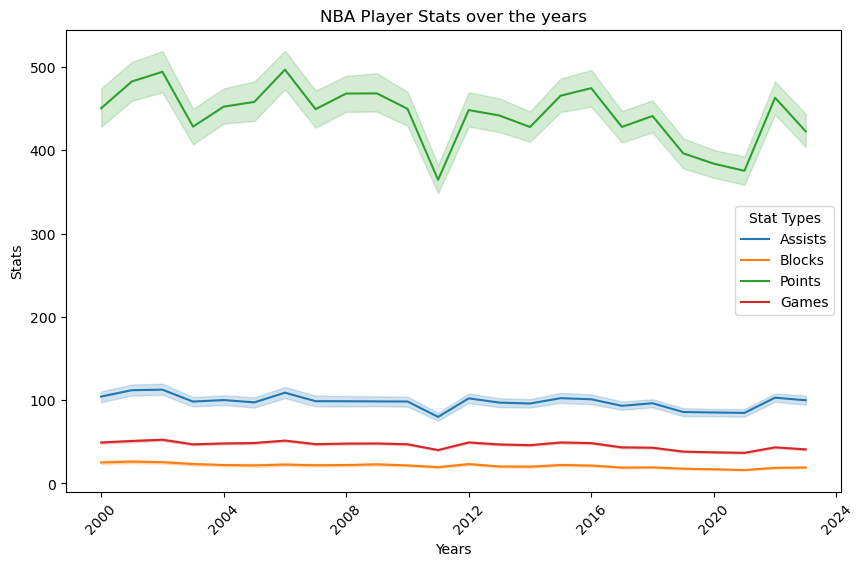

In [214]:
#number of assists, blocks, points, and games played over the last 24 years
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Year", y="Assists", label="Assists")
sns.lineplot(data=df, x="Year", y="Blocks", label="Blocks")
sns.lineplot(data=df, x="Year", y="Points",label="Points")
sns.lineplot(data=df, x="Year", y="Games_Played",label="Games")
plt.xlabel("Years")  # x-axis label
plt.ylabel("Stats")  # y-axis label
plt.title("NBA Player Stats over the years")
plt.xticks(rotation=45)
plt.legend(title="Stat Types")
plt.show()

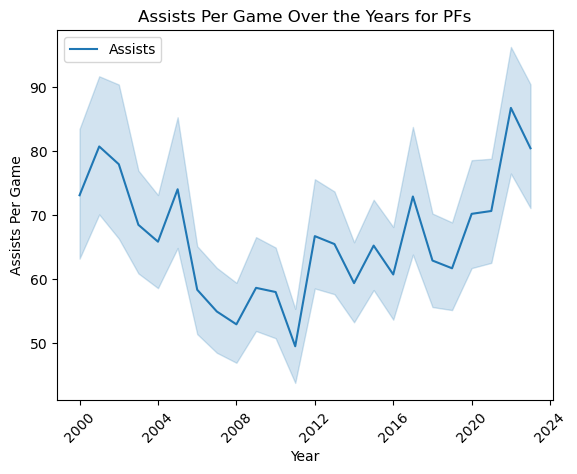

In [215]:
# Filter only Power Forwards (PF)
df_power_foward = df[df["Position"] == "PF"] 


sns.lineplot(data=df_power_foward, x="Year", y="Assists", label="Assists")
plt.xlabel("Year")
plt.ylabel("Assists Per Game")
plt.title("Assists Per Game Over the Years for PFs")
plt.xticks(rotation=45)



plt.show()

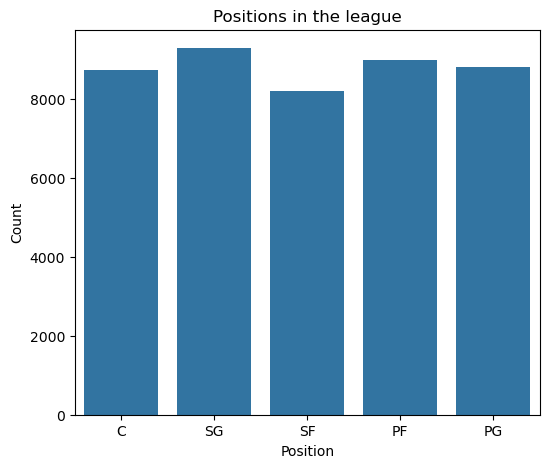

In [216]:
plt.figure(figsize=(6,5))
sns.countplot(x=df['Position'])
plt.title("Positions in the league")
plt.xlabel("Position")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'Frequency')

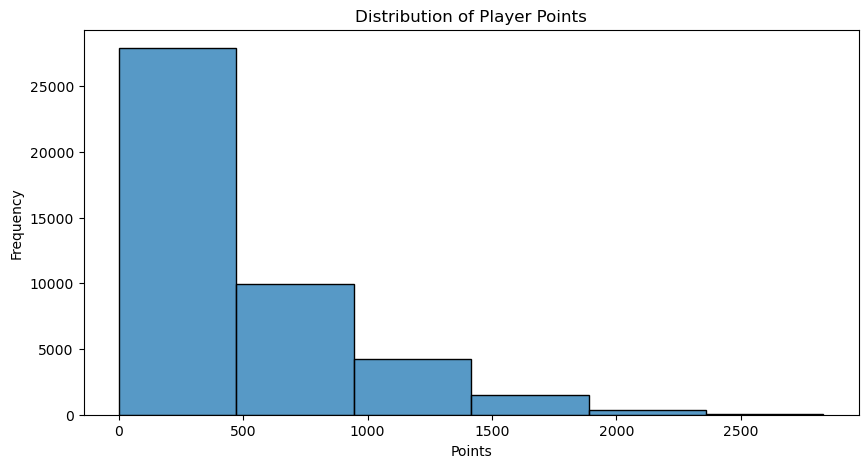

In [217]:
#players point count 
plt.figure(figsize=(10, 5))
sns.histplot(df['Points'], bins= 6)
plt.title("Distribution of Player Points")
plt.xlabel("Points")
plt.ylabel("Frequency")

In [218]:
df.head(1)

,Year,Player,Age,Team,Position,Games_Played,Games_Started,Minutes_Played,Field_Goals_Made,Field_Goal_Percentage,...,Free_Throw_Percentage,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Points,Triple_Doubles,Awards
24631,2000-01-01,Luc Longley,32.0,NYK,C,25.0,2.0,301.0,18.0,0.333,...,0.765,66.0,7.0,3.0,9.0,22.0,51.0,49.0,0.0,NaN


In [219]:
#filtering out each position
df_powerforward = df[df["Position"] == "PF"]
df_point_guard = df[df["Position"] == "PG"]
df_shooting_guard = df[df["Position"] == "SG"]
df_small_forward = df[df["Position"] == "SF"]
df_center = df[df["Position"] == "C"]


In [220]:
mvp_awards_list = df[df["Awards"].str.contains("MVP", case=False, na=False)] 
mvp_awards_list


,Year,Player,Age,Team,Position,Games_Played,Games_Started,Minutes_Played,Field_Goals_Made,Field_Goal_Percentage,...,Free_Throw_Percentage,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Points,Triple_Doubles,Awards
13948,2000-01-01,Tracy McGrady,21.0,ORL,SG,77.0,77.0,3087.0,788.0,0.457,...,0.733,580.0,352.0,116.0,118.0,198.0,160.0,2065.0,0.0,MVP-6MIP-1ASNBA2
13947,2000-01-01,Vince Carter,24.0,TOR,SF,75.0,75.0,2979.0,762.0,0.460,...,0.765,416.0,291.0,114.0,82.0,167.0,205.0,2070.0,0.0,MVP-11ASNBA2
13946,2000-01-01,Paul Pierce,23.0,BOS,SF,82.0,82.0,3120.0,687.0,0.454,...,0.745,522.0,253.0,138.0,69.0,262.0,251.0,2071.0,0.0,-MVP 13.00
13945,2000-01-01,Shaquille O'Neal,28.0,LAL,C,74.0,74.0,2924.0,813.0,0.572,...,0.513,940.0,277.0,47.0,204.0,218.0,256.0,2125.0,0.0,MVP-3DPOY-8ASNBA1
13944,2000-01-01,Allen Iverson,25.0,PHI,SG,71.0,71.0,2979.0,762.0,0.420,...,0.814,273.0,325.0,178.0,20.0,237.0,147.0,2207.0,0.0,MVP-1DPOY-11ASNBA1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38611,2023-01-01,Nikola Jokić,28.0,DEN,C,79.0,79.0,2737.0,822.0,0.583,...,0.817,976.0,708.0,108.0,68.0,237.0,194.0,2085.0,25.0,MVP-1CPOY-4ASNBA1
38610,2023-01-01,Jalen Brunson,27.0,NYK,PG,77.0,77.0,2726.0,790.0,0.479,...,0.847,278.0,519.0,70.0,13.0,186.0,144.0,2212.0,0.0,MVP-5CPOY-5ASNBA2
38609,2023-01-01,Giannis Antetokounmpo,29.0,MIL,PF,73.0,73.0,2567.0,837.0,0.611,...,0.657,841.0,476.0,87.0,79.0,250.0,210.0,2222.0,10.0,MVP-4DPOY-9CPOY-12ASNBA1
38608,2023-01-01,Shai Gilgeous-Alexander,25.0,OKC,PG,75.0,75.0,2553.0,796.0,0.535,...,0.874,415.0,465.0,150.0,67.0,162.0,184.0,2254.0,0.0,MVP-2DPOY-7CPOY-3ASNBA1


In [221]:
df.head()

,Year,Player,Age,Team,Position,Games_Played,Games_Started,Minutes_Played,Field_Goals_Made,Field_Goal_Percentage,...,Free_Throw_Percentage,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Points,Triple_Doubles,Awards
24631,2000-01-01,Luc Longley,32.0,NYK,C,25.0,2.0,301.0,18.0,0.333,...,0.765,66.0,7.0,3.0,9.0,22.0,51.0,49.0,0.0,NaN
13948,2000-01-01,Tracy McGrady,21.0,ORL,SG,77.0,77.0,3087.0,788.0,0.457,...,0.733,580.0,352.0,116.0,118.0,198.0,160.0,2065.0,0.0,MVP-6MIP-1ASNBA2
13947,2000-01-01,Vince Carter,24.0,TOR,SF,75.0,75.0,2979.0,762.0,0.460,...,0.765,416.0,291.0,114.0,82.0,167.0,205.0,2070.0,0.0,MVP-11ASNBA2
13946,2000-01-01,Paul Pierce,23.0,BOS,SF,82.0,82.0,3120.0,687.0,0.454,...,0.745,522.0,253.0,138.0,69.0,262.0,251.0,2071.0,0.0,-MVP 13.00
13945,2000-01-01,Shaquille O'Neal,28.0,LAL,C,74.0,74.0,2924.0,813.0,0.572,...,0.513,940.0,277.0,47.0,204.0,218.0,256.0,2125.0,0.0,MVP-3DPOY-8ASNBA1


In [223]:
df_powerforward = df[df["Position"] == "PF"]
df_point_guard = df[df["Position"] == "PG"]
df_shooting_guard = df[df["Position"] == "SG"]
df_small_forward = df[df["Position"] == "SF"]
df_center = df[df["Position"] == "C"]

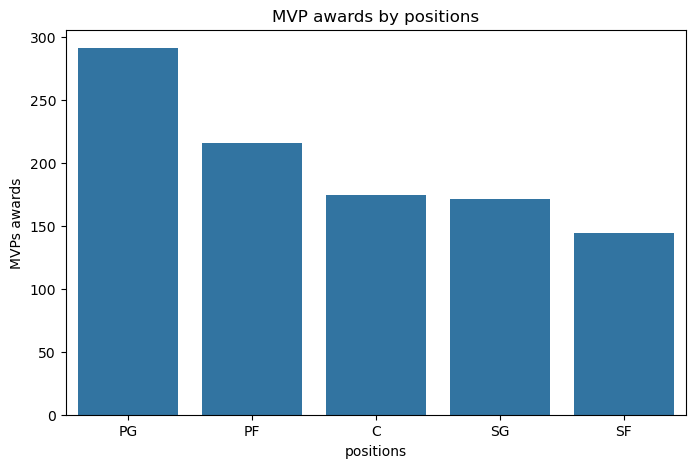

In [230]:
mvp_awards_list = df[df["Awards"].str.contains("MVP", case=False, na=False)]

# Step 2: Count MVPs per position
mvp_counts = mvp_awards_list["Position"].value_counts().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=mvp_counts, x= "Position", y= "count")
plt.xlabel("positions")
plt.ylabel("MVPs awards")
plt.title("MVP awards by positions")
plt.show()

